# ECON 325: Introduction to Data Visualization I
* **Authors**: COMET Team (Anneke Dresselhuis, Jonathan Graves)
* **Last Update**: Date 
---

## Outline

### Prerequisites

* Introduction to Jupyter
* Introduction to R
   * Be able to load data and packages in R
   * Be able to create variables and objects in R
   * Be familiar with the general syntax of R commands

### Learning Outcomes

* Identify best practices for data visualization design
* Describe when to use the following kinds of visualizations to answer specific questions using a data set:
   * scatterplots
   * line plots
   * bar plots
   * histograms
* Use the `ggplot2` package in R to create and refine the above visualizations using
   * geometric objects
   * aesthetic mappings: `x`, `y`, `fill`, `color`
   * labeling: `xlab`, `ylab`, `labs`
   * font control and legend positioning: theme
* Describe the difference between vector and raster file outputs
* Use `ggsave` to save visualizations in `.png` and `.svg` format

### References


* Timbers, T., Campbell, T., Lee, M. (2022). [_Data Science: A First Introduction_.](https://datasciencebook.ca/viz.html) 
* Metwalli, S. A. (2021, July 15). Data Visualization 101: How to choose a chart type. Medium. Retrieved June 10, 2022, from https://towardsdatascience.com/data-visualization-101-how-to-choose-a-chart-type-9b8830e558d6 


## Part 1: Understanding Visualization

### Introduction

> **"The purpose of a visualization is to answer a question about a data set of interest."** 
\
Timbers, T., Campbell, T., Lee, M. (2022). [_Data Science: A First Introduction_.](https://datasciencebook.ca/viz.html) 

In econometrics, good data visualizations should always answer a well-thought-out and relevant economic research question. A good data visualization should also exist as a standalone explanation - that is, it should provide readers with a clear understanding of both the research question at hand and its answer in a way that doesn't require further explanation.

As we learn the iterative practice of making data visualizations, it's helpful to keep the following questions in mind as we make decisions about what to include/exclude in our graphic:
* _Who is our audience?_
* _What do they know?_
* _What is the question we're trying to answer?_

Not only are data visualizations incredibly important as narrative outputs from data analysis, they are also a beneficial tool to use iteratively throughout our analysis to identify patterns or anomalies as we process our data. We'll begin here with a few notes about best practices for visualizations.

### Principles of Design: Data Visualization _DOs_ and _DONT's_
> **DO** use data visualization to tell the story of the data _truthfully_ \
**DO** remember that a visualization's accuracy is only as good as the data is \
**DO** label your axes in font sizes that are readable and use descriptive titles

> **DON'T** choose colours that are very similar each other when trying to distinguish 2 variables (eg, choose red and blue rather than red and orange) \
**DON'T** use design features (eg, exaggerated scaling) to manipulate readers into believing a particular narrative of the data

### Types of Visualizations:

The four plot types we will be working with in this worksheet are **Scatter plots**, **Bar plots**, **Line plots** and **Histograms** which can all be found in the `ggplot2` package. 

> Note that there are many more types of plots that can be generated using this package. We'll explore some of these in the notebook, _Introduction to Data Visualization II_ or you can check out [R studio's ggplot2 Cheat Sheet](https://www.rstudio.com/resources/cheatsheets/) to see for yourself in the meantime.

1. A **Scatter plot** visualizes the relationship between two quantitative variables
   * This plot works great when we are interested in showing relationships and groupings among variables from relatively large datasets
2. A **Line plot** visualizes trends with respect to an independent, ordered quantity (e.g., time)
   * This plot works great when one of our variables is ordinal (time-like) or when we want to display multiple series on a common timeline
3. A **Bar plot** visualizes comparisons of amounts
   * This plot works great when we are interested in comparing a few categories as parts of a whole, or across time
4. A **Histogram** visualizes the distribution of one quantitative variable
   * This plot works great when we are working with a discrete variable and are interested in visualizing all its possible values and how often they occur
   
_Definitions adapted from: [_Data Science: A First Introduction_.](https://datasciencebook.ca/viz.html)_

![Examples of Four Plot Types](media/plot_type_examples.png "Figure 4.1: Examples of scatter, line and bar plots, as well as histograms.")

_Figure 1. Examples of scatter, line and bar plots, as well as histograms. (from [Data Science: A First Introduction](https://datasciencebook.ca/viz.html))_

### Loading data

In this tutorial, we will be working with the Penn World Table 10.0.  This data is via:

* Feenstra, Robert C., Robert Inklaar and Marcel P. Timmer (2015), "The Next Generation of the Penn World Table" American Economic Review, 105(10), 3150-3182, available for download at https://www.rug.nl/ggdc/productivity/pwt/

To download the dataset we will be using for this notebook:
1. Click the link provided above. The PWT page should appear
2. Scroll down until three access options appear
3. Click Stata and a Stata file (`.dta`) should immediately download. Now move that file to your media directory and we can start the analysis!

We can now get started by importing the packages and data into our notebook, so that we can use it.  You should also check out the documentation on the link above, if you're not sure what a variable does or represents.

In [1]:
source("testing_intro_to_visualization.r")

Warning message:
“package ‘testthat’ was built under R version 4.1.3”


In [2]:
# import packages
library(tidyverse) # contains ggplot2, which is what we'll be using!
library(haven)

# load the data
pwt_data <- read_dta("media/pwt100.dta") # make sure that the .dta file has this exact name

# declare factors
pwt_data <- as_factor(pwt_data)

pwt_data <- pwt_data %>%
    mutate(countrycode = as.factor(countrycode)) %>%
    mutate(country = as.factor(country)) %>%
    mutate(currency_unit = as.factor(currency_unit))

# check that it looks OK
glimpse(pwt_data)
# there will be a lot of missing data

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
Warning message:
“package ‘dplyr’ was built under R version 4.1.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::edition_get()   masks testthat::edition_get()
✖ dplyr::filter()        masks stats::filter()
✖ purrr::is_null()       masks testthat::is_null()
✖ dplyr::lag()           masks stats::lag()
✖ readr::local_edition() masks testthat::local_edition()
✖ dplyr::matches()       masks tidyr::matches(), testthat::matches()

Warning message:
“package ‘haven’ was built under R version 4.1.3”


Rows: 12,810
Columns: 52
$ countrycode   <fct> ABW, ABW, ABW, ABW, ABW, ABW, ABW, ABW, ABW, ABW, ABW, A…
$ country       <fct> "Aruba", "Aruba", "Aruba", "Aruba", "Aruba", "Aruba", "A…
$ currency_unit <fct> Aruban Guilder, Aruban Guilder, Aruban Guilder, Aruban G…
$ year          <dbl> 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 19…
$ rgdpe         <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ rgdpo         <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ pop           <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ emp           <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ avh           <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ hc            <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ ccon          <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ cda           <dbl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, …
$ cgdpe        

As you can see, this data set includes 12,810 observations and many different variables.

> Question time: **How many variables are included in this data set?** \
_Hint: variables are stored in columns_

In [3]:
#Fill in the ... below with your answer to the above question

answer_1 <- ...

test_1()

ERROR: Error in eval(expr, envir, enclos): '...' used in an incorrect context


#### Understanding `ggplot2`
R uses a "language" for how graphics are created called the **grammar of graphics**, which is a system of best practices from statistical visualization theory that centres data in the process. 

> **Note**: An important companion to this Notebook is the `ggplot2` cheatsheet that you can find among the [RStudio collection of cheatsheets](media/data-visualization.pdf).  This is CC-by-SA Material, and is available from RStudio's [website](https://www.rstudio.com/resources/cheatsheets/)

#### Layers with `ggplot`

Essentially, in this "grammar" of graphics, we create a series of "layers" which implement a specific visual output:

* First, we identify a dataset from which we want to create our graph (```data=```)
* Then, we associate variables in that dataset to **aesthetics** (```aes=```)
  * **Aesthetics** represent different properties of a graph, like "what goes on the $x$-axis", or "what does the color of the line represent".  Each type of visualization is associated with a collection of necessary and optional aesthetic features.
* Next, we attach a coordinate system and a plot type to the graph using ```geom```, which takes the aesthetics and describes them
  * This will also include options like ```position``` which indicates how to combine elements (e.g. stack the bars in a barchart, or place them side-by-side)
* Finally, we can tweak the visualization - such as adding labels or changing the colour scheme

Let's see what this looks like in practice.

#### Interpreting the Data
As we can see from our preview, this data set is quite complex. After spending some time with our data source, we understand a few of the key variables represent the following:

`rgdpe` = expenditure-side real GDP (millions of USD) \
`pop` = population of a given country (millions of people) \
`year` = year of data recording (1950-2019) \
`country` = country being studied (183 countries are captured in this data set) \
`hc` = an index of human capital per person, which is based on average years of schooling and the return to education \
`emp` = number of persons engaged in employment (millions)

#### Beginning our Analysis

Let's say we are interested in creating a visualization that answers the following question:\
**How has real GDP per Capita changed over time in North American countries?**

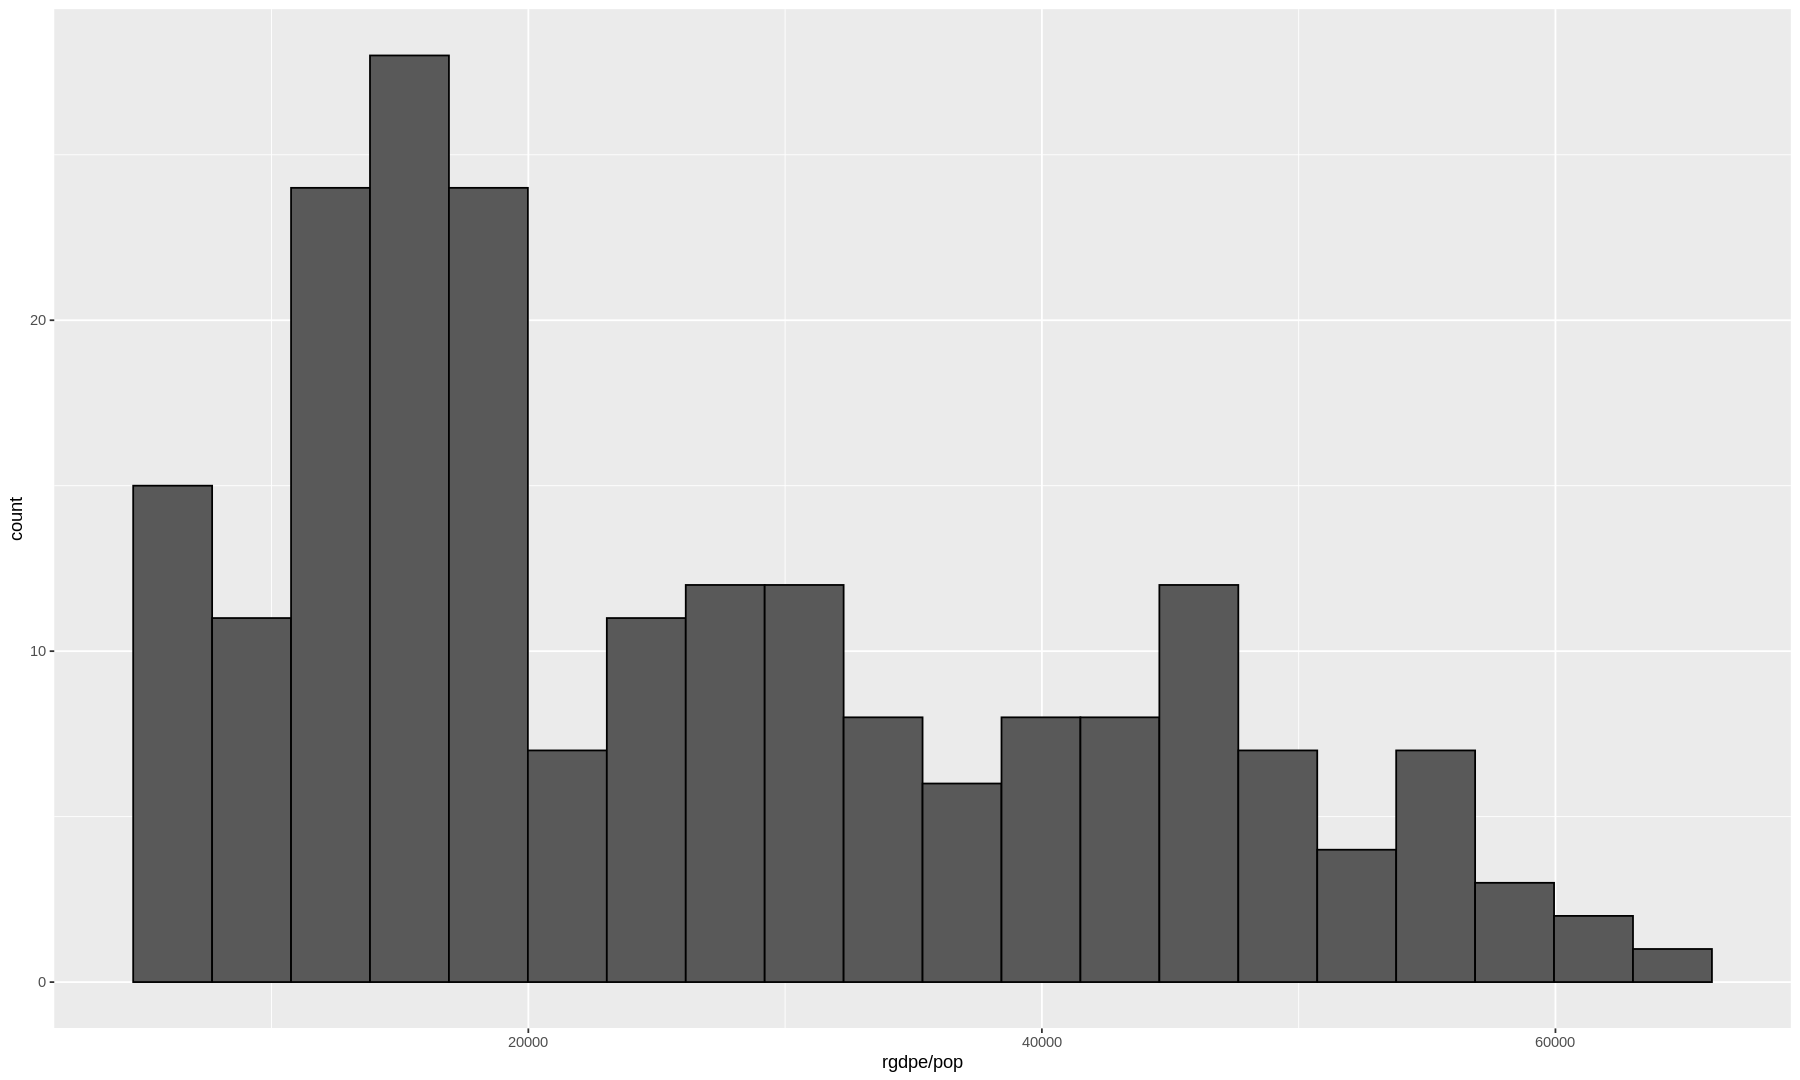

In [35]:
# First, filter the dataset to only include data on North American countries
NA_data <- filter(pwt_data, (countrycode == "CAN")|(countrycode == "USA")|(countrycode == "MEX"))

# We can take a look at our the rgdpe/pop variable will distributed by making a quick histogram here
histogram <- ggplot(data = NA_data, aes(x = rgdpe/pop)) + 
             geom_histogram(colour = "black", bins = 20)
histogram

It looks like a solid number of GDP per capita measurements are under 20,000 - what might be driving this? Let's get back to our main chart to find out!

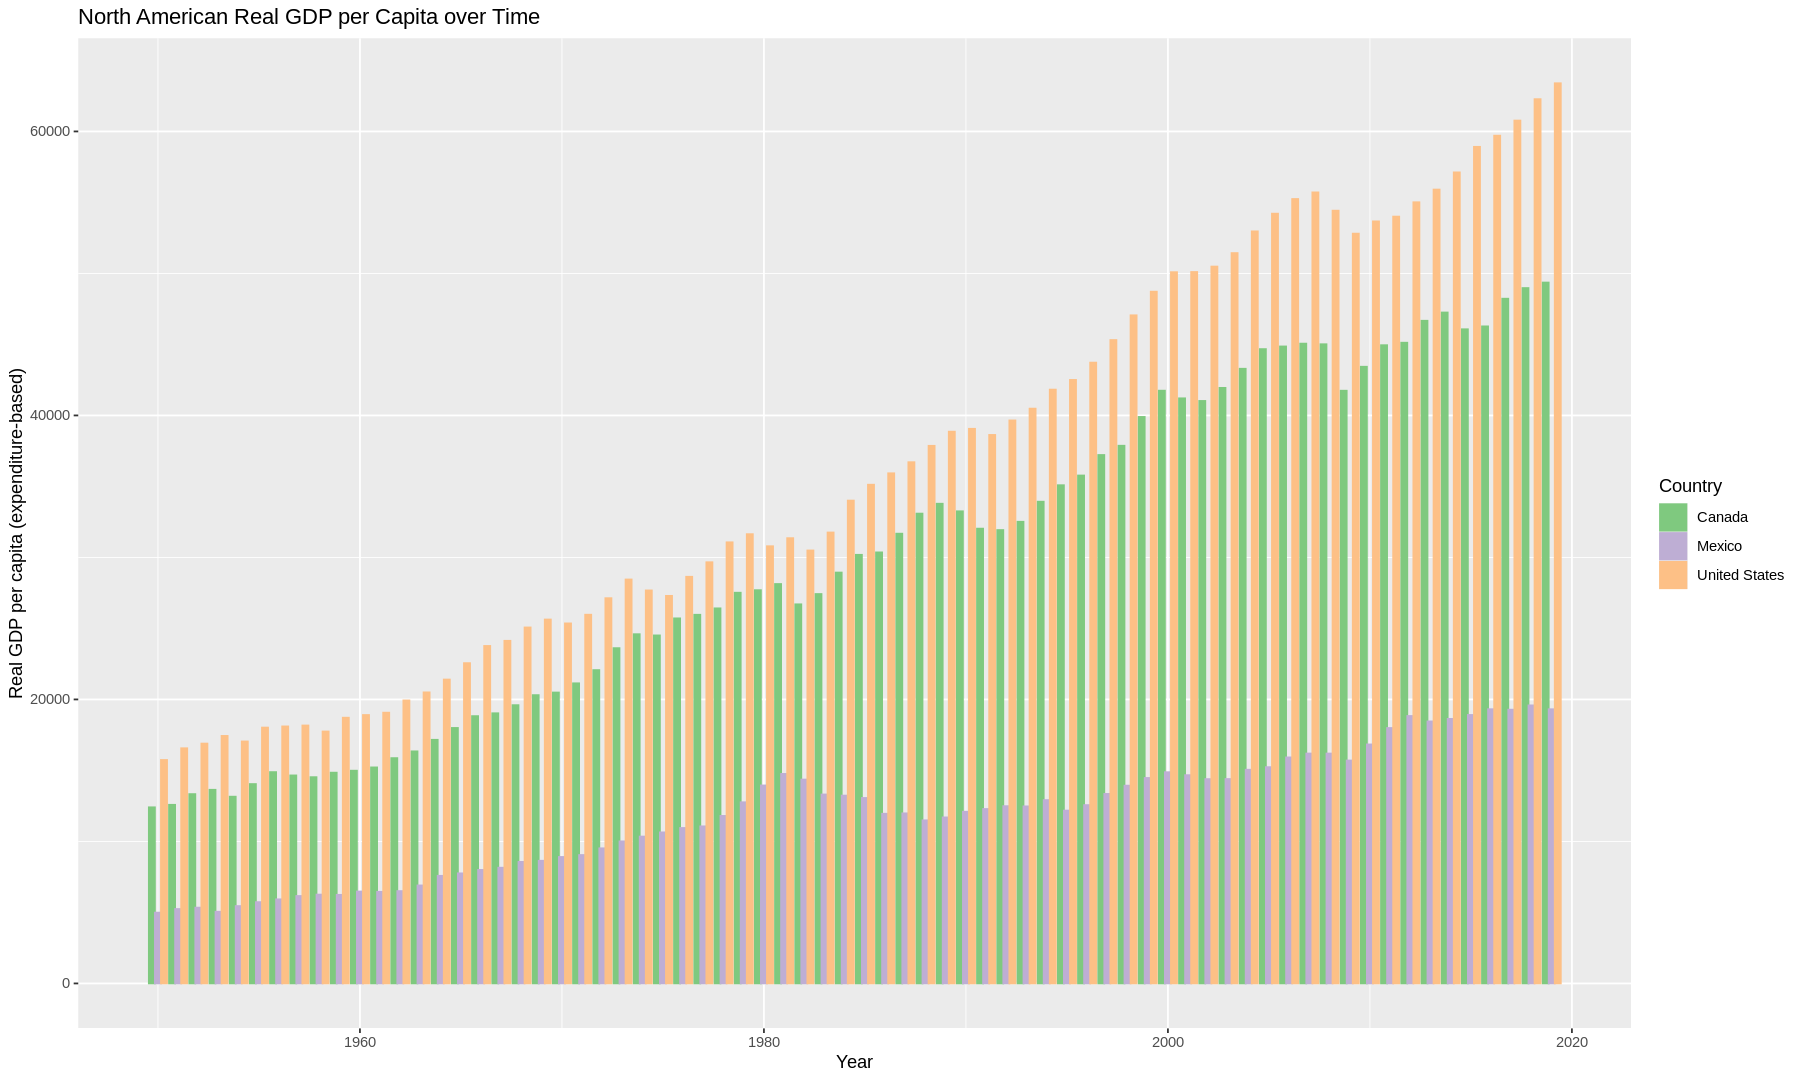

In [33]:
# Second, input data frame for the graphic (this case NA_data) and specify the set of plot aesthetics (which variables will be included) using the command ggplot
plot <- ggplot(data = NA_data,  # this declares the data for the chart; all variable names are in this data
                aes(# this is a list of the aesthetic features of the chart
                    x = year,   # for example, the x-axis will be "year" (a continuous variable)
                    y = rgdpe/pop, # the y-axis will be expenditure-based real GDP per capita
                    fill = country, # the colour fill will be country
                    color = country # so will the outline
                ),
                )

# Third, input the labels to the aesthetic features added above
plot <- plot + labs( # add human-readable, aesthetic labels
                    x = "Year",  # label for the x aesthetic (x-axis title)
                    y = "Real GDP per capita (expenditure-based)", #y-axis title
                    color = "Country", # the meaning of color
                    fill = "Country", # ...etc.
                    title = "North American Real GDP per Capita over Time") # and title of plot

# Because the variable "country" is expressed by colours, we are able to change the colours used in the chart using the commands below. Try playing with different palettes. To display other palettes use the command display.brewer.all()
plot <- plot + scale_fill_brewer(palette="Accent") #set the colour palette for fills
plot <- plot + scale_color_brewer(palette="Accent") #set the colour palette for outlines
options(repr.plot.width = 15, repr.plot.height = 9) #adjusts plot size: try playing around with the dimensions, and then return the values to width = 15 and height = 9

#Finally, input the type of vizualisation of the chart
plot1 <- plot + geom_col( # now we add the visualization (geom)col() produces a bar graph)
                    position = "dodge") #this places the visualizations side-by-side
                                        #if you change position to "stack" it will be a stacked graph!
plot1

Beautiful!  It's also very easy for use to quickly change the visualization.  For instance, if we wanted to make this a line graph instead of a bar chart, we could do the following:

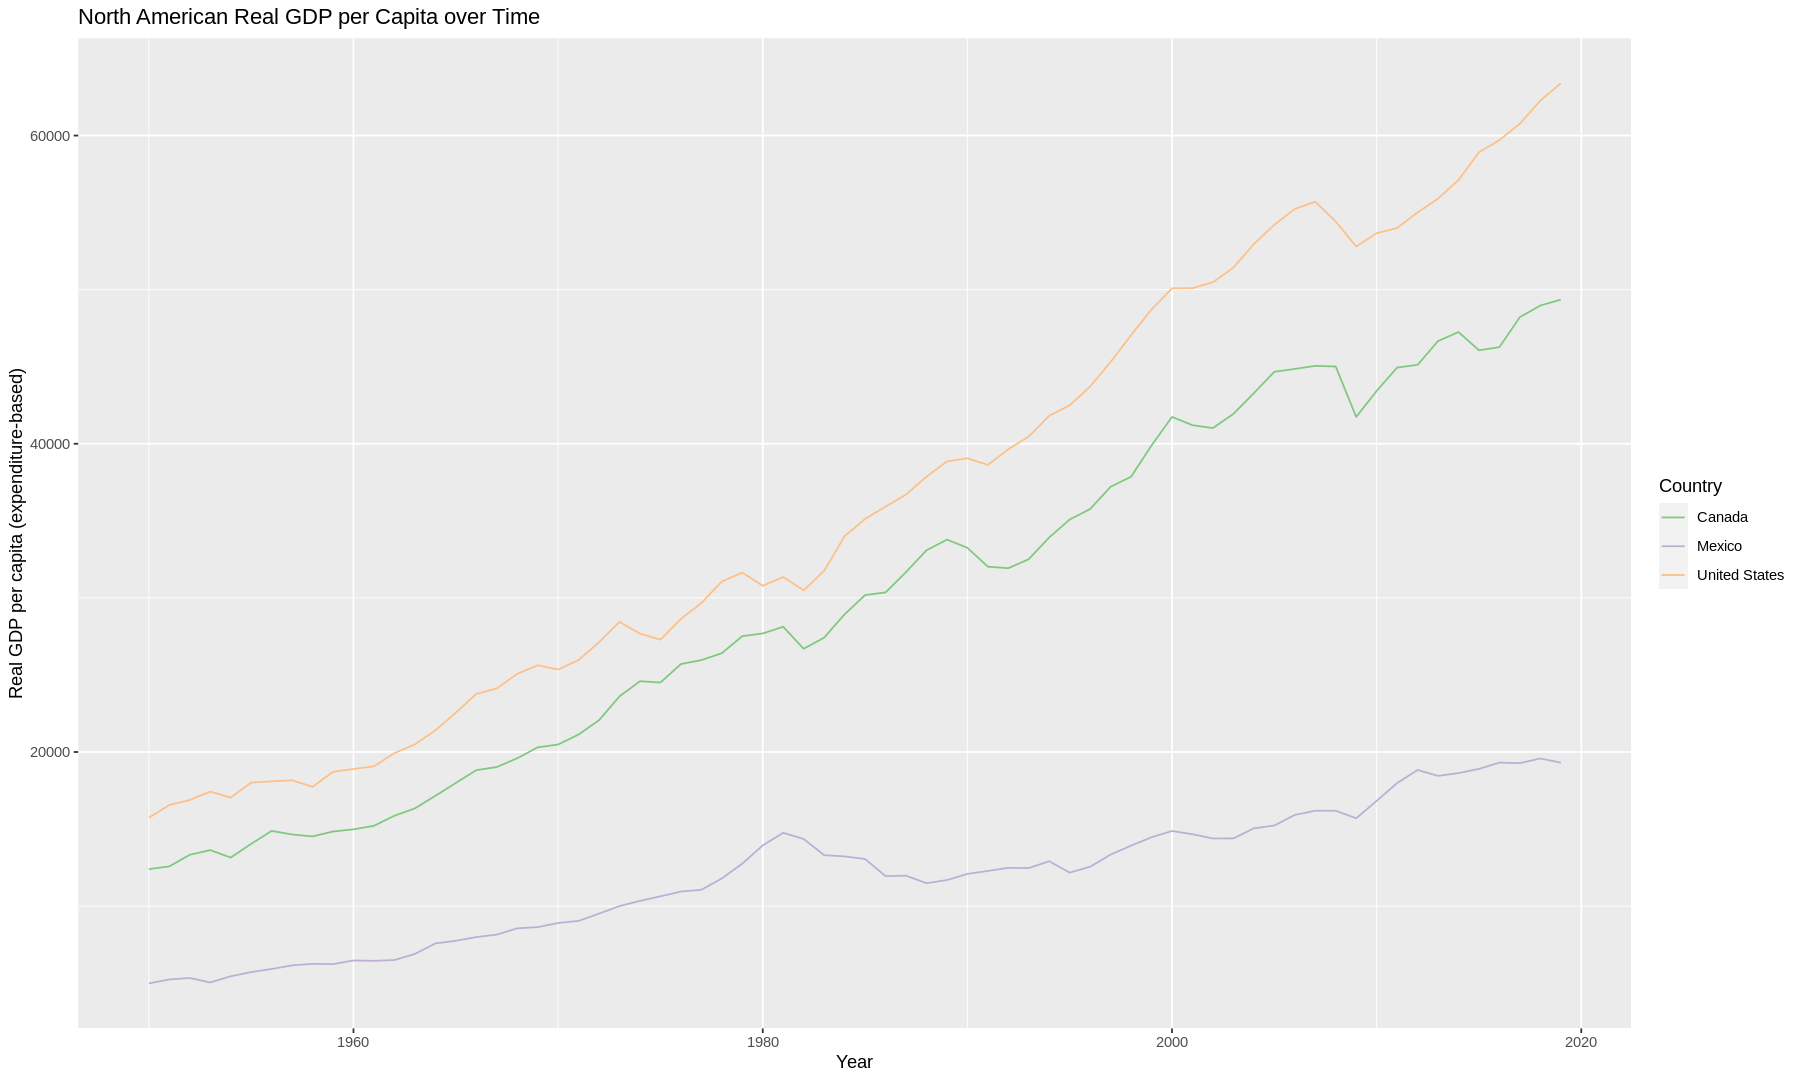

In [7]:
# fig.width = 40
plot2 <- plot + geom_line()

plot2 # show the plot

Nice! Don't worry if any or all of this feels confusing right now - we're going to work through a few more examples together. If you're having troubling reading the text on your graphic outputs, we'll walk through how to adjust text size in the next section as well!

## Part 2: Building a Visualization


Next, let's learn about how we build visualizations.  It's important to note that we should approach this _iteratively_ by building our visualization piece-by-piece, making adjustments along the way.  We don't have to get it completely right on the first try!

Let's say we are interested in creating a visualization that answers the following question:\
**What is the relationship between GDP per capita and human capital in the world today?**

The first thing we want to do is identify what data we need:
* We will need GDP, which we can get using either ```rdgpe``` or ```rdgpo``` (Quiz: what's the difference?)
* We will need population, which we can get using ```pop```
* We will need human capital, which is the variable ```hc```
* We will need data from "today", which is ```year == 2019```, the most recent data in our sample

Let's start out by ```filter```-ing the data to just get 2019 data.

In [8]:
figure_data <- filter(pwt_data, year == 2019)

head(figure_data$year)

[1] 2019 2019 2019 2019 2019 2019

Nice, it looks like we've got all the 2019 data!  Next we need to start creating our object - however, we should pause for a moment an consider what kind of vizualization we want.  

* Our question is about the relationship between two quantitative variables
* We are interested in understanding how they move together

While there are a couple of options, we'll start with a **scatterplot**.  If we consult our [cheat-sheet](https://www.rstudio.com/resources/cheatsheets/), we can see that scatterplots are the ```geom_point()``` command.  This _requires_ the aesthetic properties:
* ```x```, the $x$-axis
* ```y```, the $y$-axis

We then have other optional ones, like ```alpha, color, fill, shape, size, stroke``` which we won't use here but you can check their function also on the [R studio's ggplot2 Cheat Sheet](https://www.rstudio.com/resources/cheatsheets/).

Notice an important fact: you can assign aesthetics on _either_ the ```ggplot``` layer _or_ on a ```geom```.  The difference is that the ```ggplot``` aesthetics are automatically inherited by all other layers; there's no other real difference.

> Important Note: generally, any aesthetic property which can be assigned in ```aes()``` can also be assigned to the ```geom``` directly.  For example, if you wanted to make a line dashed or a point red, you could do this by setting ```geom_point(color = "red")```.  However, this will apply to all parts of the ```geom``` so use it wisely!

Let's start simple, and make ```x``` represent human capital, and ```y``` represent real GDP per capita.  We can start our visualization by creating our ```ggplot``` object and assigning all these properties:

In [9]:
figure <- ggplot(data = figure_data, # associate the data we chose
                 aes(
                     x = hc,  # x is human capital
                     y = rgdpe/pop # we divide rgdpe by pop to get gdp per capita
                 ))

figure <- figure + labs(x = "Human Capital",
                        y = "Real GDP per capita (expenditure-based)",
                        title = "Global GDP per Capita and Human Capital in 2019") +
                        theme(
                            text = element_text(
                                size = 20)) #increases text size: try playing around with this number!

# note: you can set aethestics to be simple functions of variables!

After running the previous cell, nothing was printed in our notebook; this is because we need to assign our visualization!  Right now, it's just data and properties.  Let's test it our by adding our ```geom_point()``` layer:

In [ ]:
figure + geom_point()

Nice!  Already looking pretty good.  But, there's still some work to do to make this graph more readable and tell the story of the dataset.  How about if we made the size of each point relative to the population?  That way, bigger countries would be more prominent on the graph.  We can do this by assigning the aesthetic again:

In [ ]:
figure + geom_point(aes(
                    size = pop,)) # assigns the size of the point to be relative to the population values

Now, let's make it more colourful.  How about if we make colour of each point change as the employment (```emp```) rate changes?   So, darker colors would represent higher labour force utilization.  Again, we can do this by assigning the aesthetic:

Warning message:
“Removed 38 rows containing missing values (geom_point).”


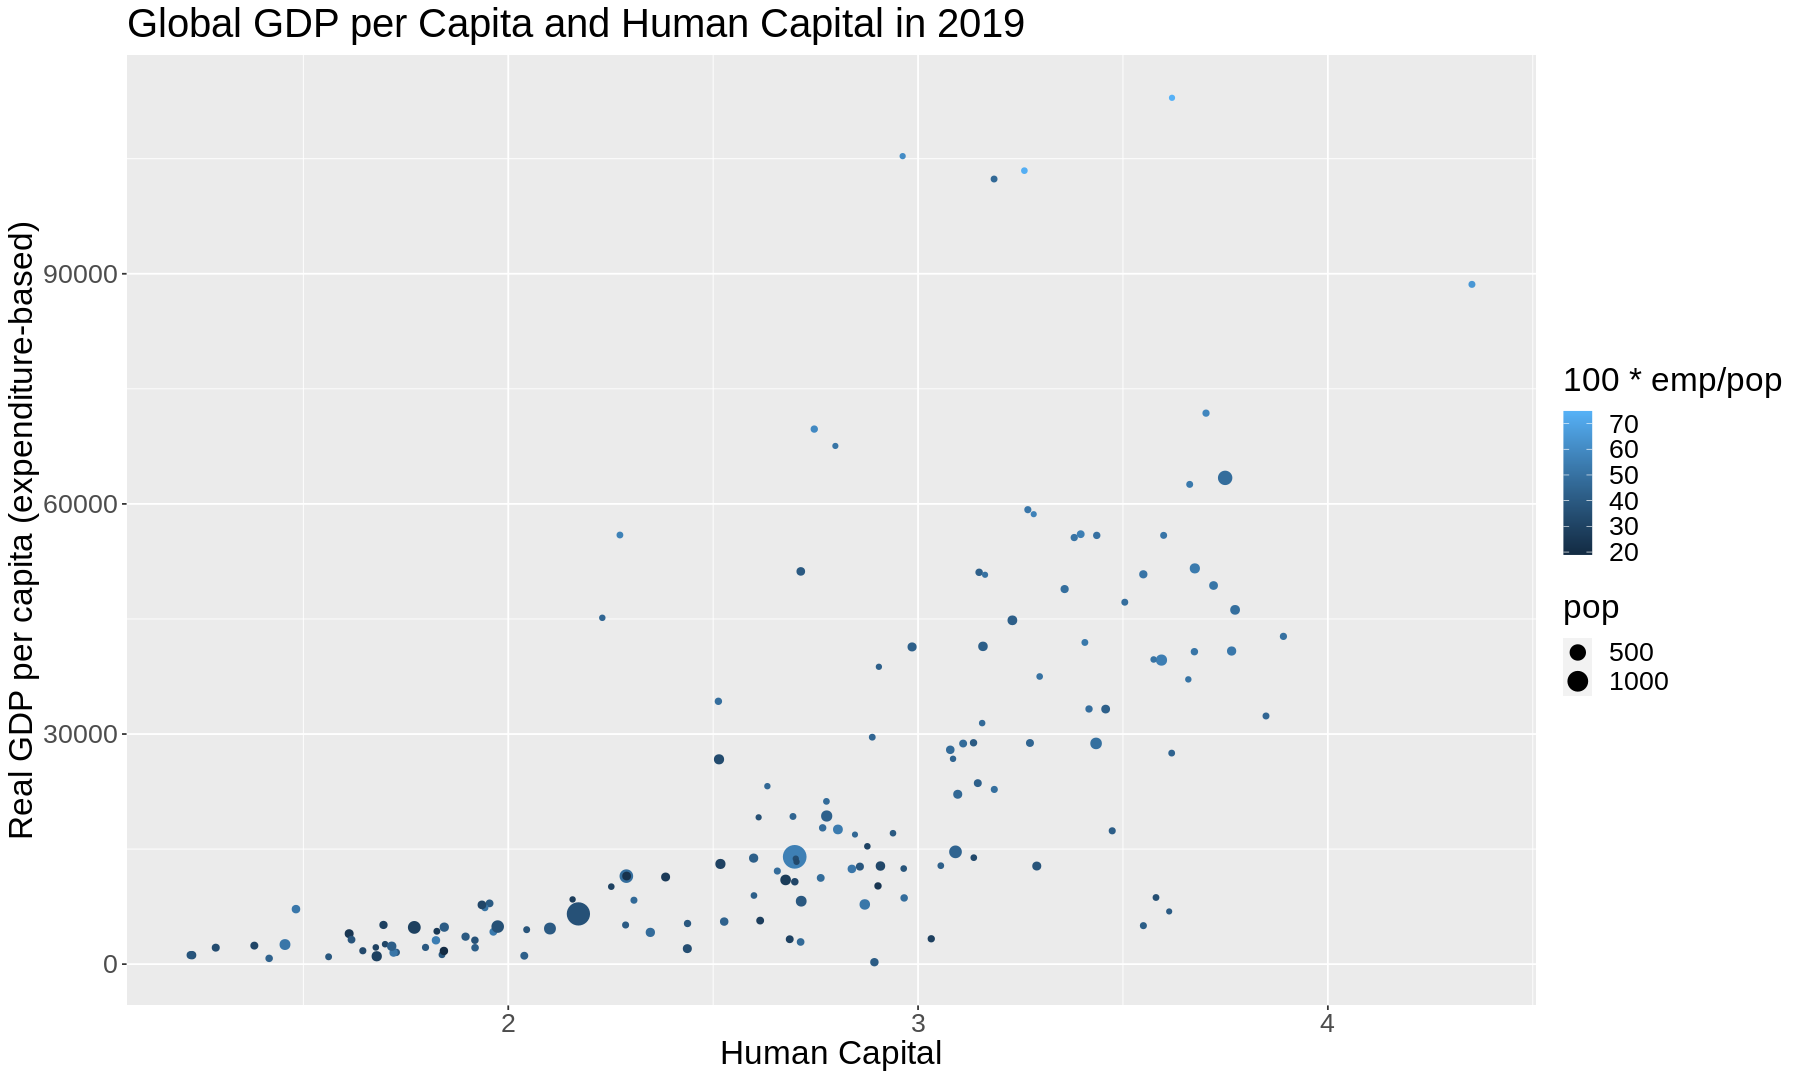

In [10]:
figure <- figure + geom_point(aes(
                    size = pop,
                    colour = 100*emp/pop))

figure

Great work!  We now have a solid visualization.  Say we're not the biggest fan of the colour blue and want to change it. The easiest way to set colours in R is using palettes.  The list of all the palette options are:

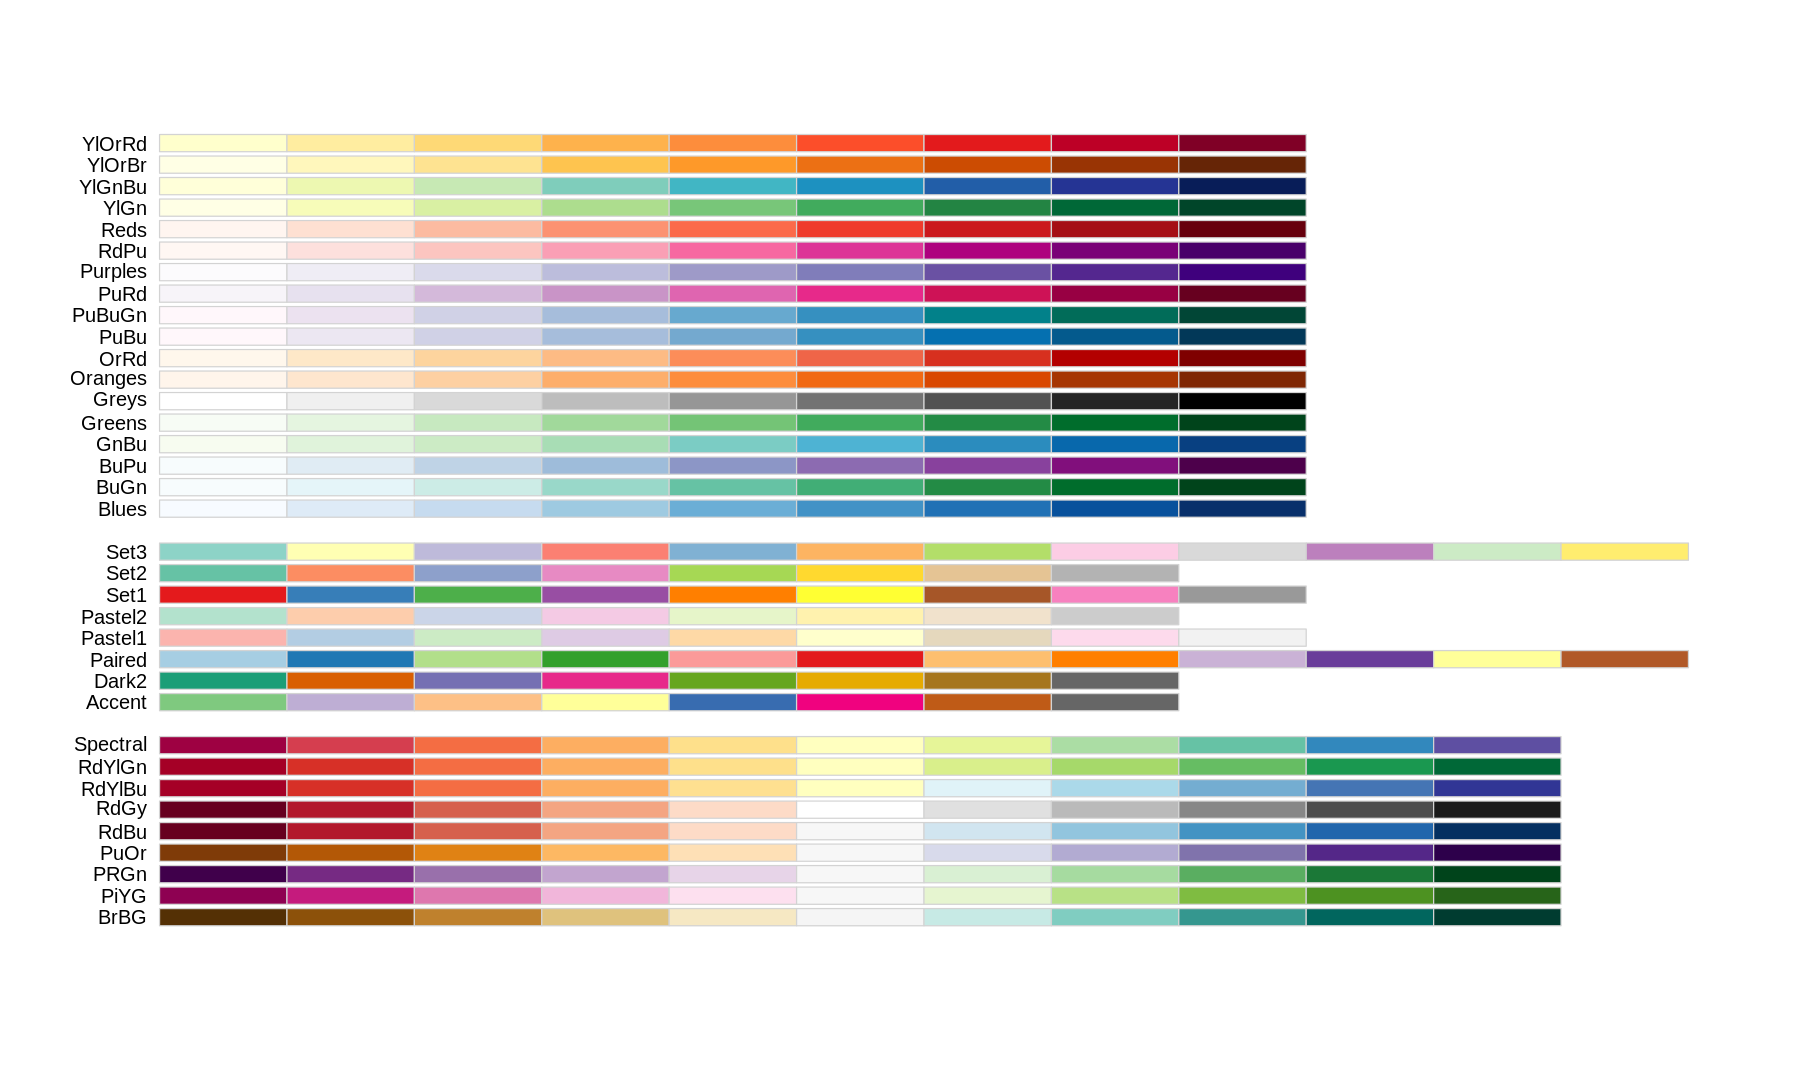

In [11]:
RColorBrewer::display.brewer.all() 

Let's choose ```YlOrRed```.  We can apply this using the following (somewhat cryptic) command:

Warning message:
“Removed 38 rows containing missing values (geom_point).”


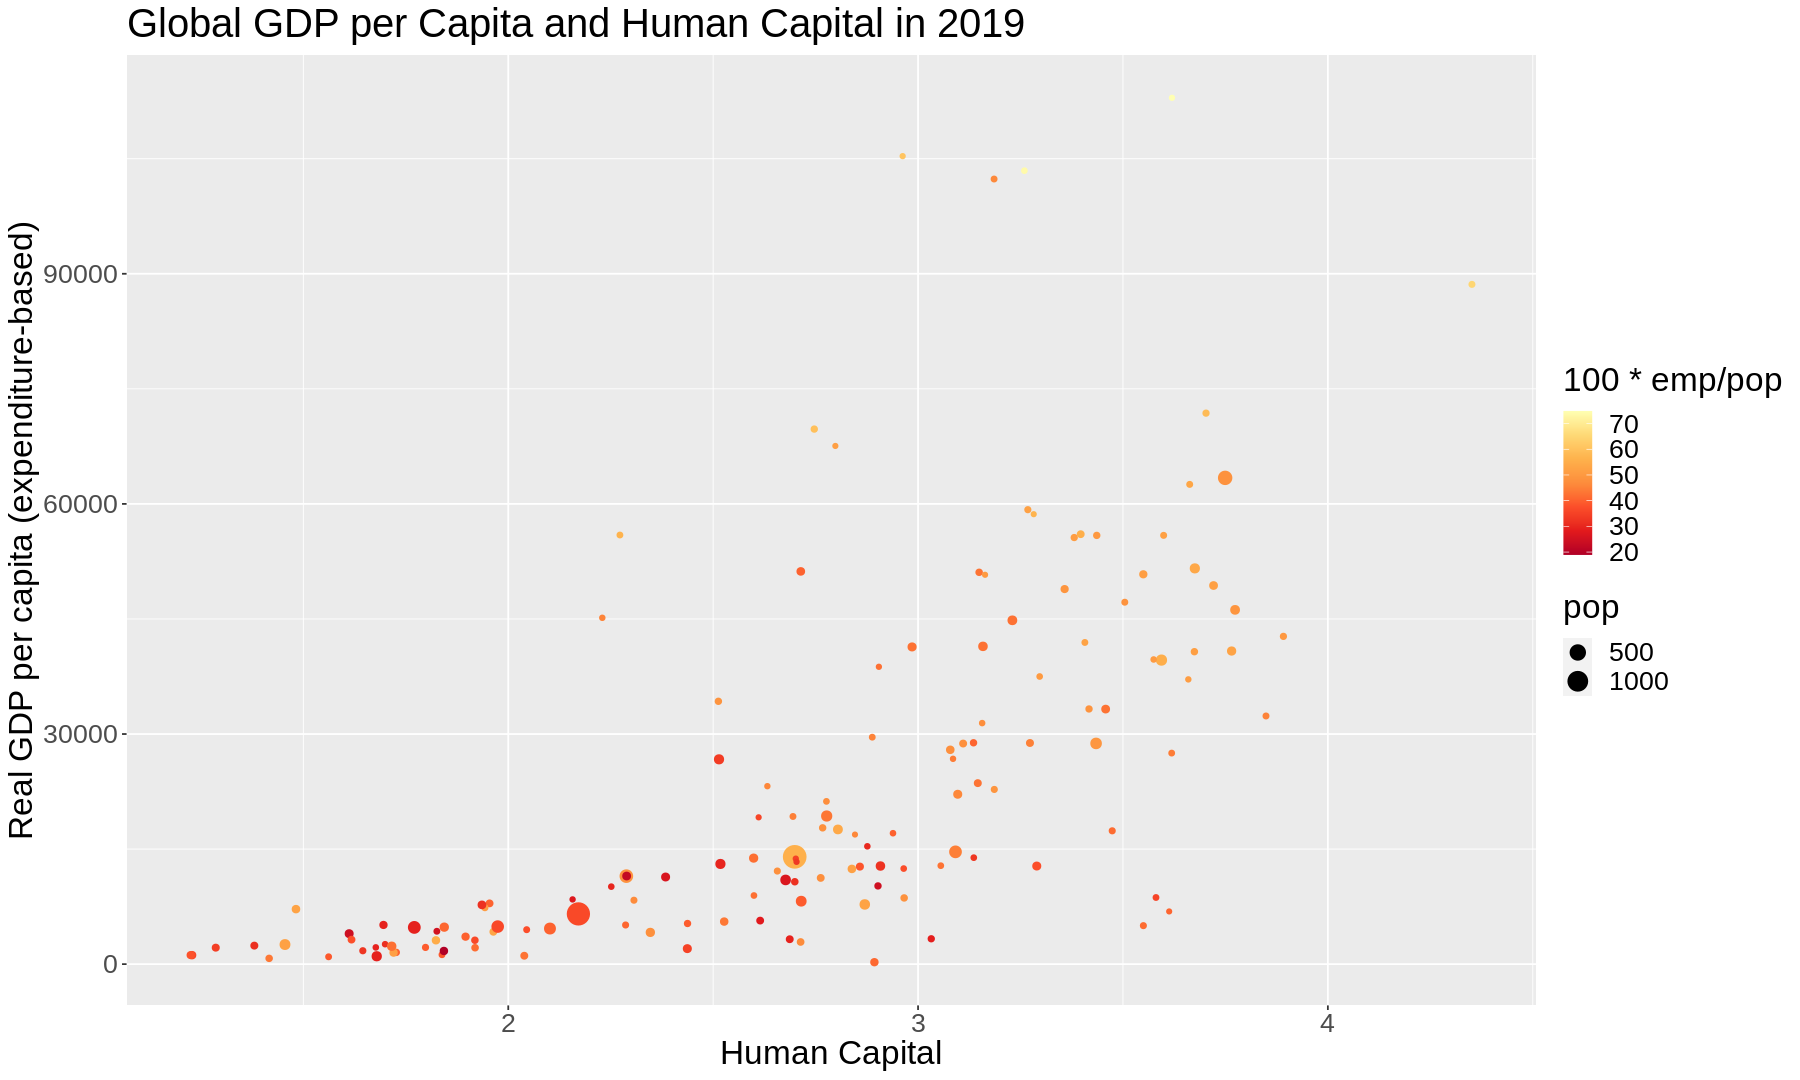

In [12]:
figure <- figure + scale_color_distiller(palette="YlOrRd")

figure

options(repr.plot.width = 15, repr.plot.height = 9)

You might have noticed that we used `color_brewer` earlier and `color_distiller` here. `color_brewer` is for visualizations with discrete variables  while `color_distiller` is for continuous. It doesn't really matter why this is, but watch out for it; R will complain.

Good work!  We now have a publication quality visualization, ready to go.  This is a good example of the process we go through when we build visualizations: a lot of experimenting, a lot of trial and error.  Always ask yourself: "is this effective? Is this what I want it to do?"

### Exporting Visualizations
Once we've decided that our graph can successfully answer our economic question, we'd like to export it from Jupyter. Once again, the `ggplot` package comes to our rescue with the following command:

* `ggsave` allows us to save a visualization using the following key arguments
   * `("file_name.file_format", my_plot, width = #, height = #)`
   
> You can check out an expanded list of possible arguments at the [R documentation page for `ggsave`](https://www.rdocumentation.org/packages/ggplot2/versions/1.0.0/topics/ggsave)

1. The first part of the argument, `"file_name.file_format"` is where we give our graphic a descriptive name and specify which file format we want our graphic to be saved in the Jupyter workspace. If you are saving to a specific folder, you can add this before the file name with a `/` in between to delineate the two (example: `"folder/file_name.file_format"`). The format you choose may depend on the context you plan to use the visualization in. Images are typically stored in either **raster** or **vector** formats. The following definitions are borrowed from [_Data Science: A First Introduction_.](https://datasciencebook.ca/viz.html#saving-the-visualization) 

**Raster images** are represented as a 2-D grid of square pixels, each with its own color. Raster images are often compressed before storing so they take up less space. A compressed format is "lossy" if the image cannot be perfectly re-created when loading and displaying, with the hope that the change is not noticeable. "Lossless" formats, on the other hand, allow a perfect display of the original image.

Common raster file types:
* JPEG (.jpg, .jpeg): lossy, usually used for photographs
* PNG (.png): lossless, usually used for plots / line drawings
* BMP (.bmp): lossless, raw image data, no compression (rarely used)
* TIFF (.tif, .tiff): typically lossless, no compression, used mostly in graphic arts, publishing
* Open-source software: GIMP

**Vector images** are represented as a collection of mathematical objects (lines, surfaces, shapes, curves). When the computer displays the image, it redraws all of the elements using their mathematical formulas.

Common vector file types:
* SVG (.svg): general-purpose use
* EPS (.eps): general-purpose use (rarely used)
* Open-source software: Inkscape

Raster and vector images have opposing advantages and disadvantages. A raster image of a fixed width and height takes the same amount of space and time to load regardless of what the image shows (the one caveat is that the compression algorithms may shrink the image more or run faster for certain images). A vector image takes space and time to load corresponding to how complex the image is, since the computer has to draw all the elements each time it is displayed. For example, if you have a scatter plot with 1 million points stored as an SVG file, it may take your computer some time to open the image. On the upside, with vector graphics you can zoom into / scale up the image as much as you like without it looking bad, while raster images eventually start to look “pixelated.”

2. The second part of the argument, `my_plot` specifies which plot in our analysis we'd like to export

3. The last key part of the argument `width =` and `height =` specifies the dimensions of our image. Because we've tinkered with the graph output size using `options(repr.plot.width = 15, repr.plot.height = 9)` above in our code, we'll want to use these dimensions as we export to ensure that our visualization isn't cut off by R's default saving dimensions. If we haven't made modifications to the size, these commands can be left out.

Try uncommenting the code section below and saving our "Global GDP per capita and Human Capital in 2019" graph in the Jupyter directory that this notebook is stored in.

In [ ]:
# ggsave("gdp_hc_plot.png", figure, width = 15, height = 9)

Did you see file appear in the directory? Now try saving the same graph as an `.svg` in the code cell below.

In [ ]:
# ggsave("gdp_hc_plot. ...", figure, width = ..., height = ...)

As we have seen, R makes it easy to create high-quality, impactful graphics.  We'll let you try it on your own now!

## Part 3: Making Your Own Chart


For the final section of this notebook, you'll make your own visualization using the Penn Data again.  Suppose you are tasked with building a visualization which explores the following question: **What is the relationship between the economic development of China and United States over time?**

Some variables you might want to consider are:

* `year`: the year of observation
* `rtfpna`: total factor productivity [(here's a link, if you're ECON 102 is rusty)](https://en.wikipedia.org/wiki/Total_factor_productivity)
* `rgdpe`: real GDP (expenditure-based)
* `pop`: population
* `ccon`: real consumption of households
* `avh`: average hours worked

To be clear: you don't need to use _all_ of these variables in your visualization.

1.  Start by deciding what variables are _essential_ and which ones are _optional_.  Choose at least two to include in your visualization.
2.  Decide what kind of visualization you want to make.  Relate your choices to the best practices for types of visualizations.
> You might want to consult the [cheat-sheet](media/data-visualization.pdf) to see your options.
3.  Finally, decide how you want to present it; what should the final product look like?

A good idea is to create it in layers, like we did before - updating as you go.  We'll start you off with some of the data and code scaffolding:

In [ ]:
# my_data <- filter(pwt_data, (countrycode == "USA")|(countrycode == "CHN"))

# my_figure # give your plot a descriptive title
# <- ggplot(data = my_data, aes( #add your aesthetics below
#                 x = ..., 
#                 y = ...,
#                 color = ...)) + # remember this is optional
#                 labs(x = "...", # what labels do you want to add?
#                     y = "...",
#                     title = "...") +
#                     theme(text = element_text(size = ...))+
#                 geom_...() # what geom will you use?  Does it need options?

#my_figure 

# uncomment (delete the leading "#" symbol) to use these lines. 
# Pro tip, you can uncomment an entire section by highlighting it and selecting "command + /"

Try to see if you can piece together a decent graph using your learning from this notebook before you continue. Depending on the direction you choose, your plot might look something like this one below.

![Total Factor Productivity Plot](media/TFP_plot.png)

This visualization was made using the following features:
* `y = year`, `x = rtfpna` 
* `geom_line()` function with argument: `size = 3` in between the parentheses to make the lines a bit more visible
* `color = country` to create two unique lines on the graph for China and the US
* `labs(color = "Country")` to give nice, human readable title to our color legend

If you're stuck, try to re-create this one, before starting on your own.